In [ ]:
#Import libraries
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.offline as pyo
from plotly.offline import iplot
import plotly.express as px
from plotly.subplots import make_subplots

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model performance
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import  KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve , precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#warnings
import warnings
warnings.simplefilter(action='ignore')

import seaborn as sns
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('creditcard_2023.csv')

In [ ]:
# Split data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Save the split datasets to new CSV files
train.to_csv("train1.csv", index=False)
test.to_csv("test1.csv", index=False)


In [ ]:
x = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
print(x.head())
print(y.value_counts())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0 -0.130006  0.727159  ...  0.091202 -0.110552  0.217606 -0.134794  0.165959   
1 -0.133118  0.347452  ... -0.233984 -0.194936 -0.605761  0.079469 -0.577395   
2 -0.095576 -0.261297  ...  0.361652 -0.005020  0.702906  0.945045 -1.154666   
3 -0.065130 -0.205698  ... -0.378223 -0.146927 -0.038212 -0.214048 -1.893131   
4 -0.212660  1.049921  ...  0.247237 -0.106984  0.729727 -0.161666  0.312561   

        V25       V26       V27       V28   

In [ ]:
print(y.isna().sum())

1


In [ ]:
data = pd.concat([x,y],axis=1)
data = data.dropna(subset=['Class'])
x = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
y = y.fillna(y.mean())

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Reshape y to be a 2D array for the imputer and fit-transform
y = imputer.fit_transform(y.values.reshape(-1, 1))

# Flatten y back to a 1D array
y = np.ravel(y)

In [ ]:
print(x.isna().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [ ]:
# Check for NaNs
assert not x.isna().any().any(), "X contains NaN values"
assert not np.isnan(y).any(), "y contains NaN values"  # Use np.isnan for NumPy arrays

# Check for infinite values
assert np.isfinite(x.values).all(), "X contains infinite values"
assert np.isfinite(y).all(), "y contains infinite values"

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
import numpy as np

# Define the sampling strategy for SMOTE (Added in this block)
sampling_strategy = 'auto'  # Use 'auto' to oversample all minority classes (Added in this block)
#sampling_strategy = 'minority' # Use 'minority' to oversample only the minority class
# Apply SMOTE with the calculated ratio and adjusted k_neighbors
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=1) # Changed k_neighbors to 1 or 2

# Fit and transform the data to oversample the minority class
x_balanced, y_balanced = smote.fit_resample(x, y)

In [ ]:
duplicates = data.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)
data= data.drop_duplicates()


Number of Duplicate Rows: 0


In [ ]:
num_df= data.select_dtypes(include="number")
cat_df = data.select_dtypes(include="object_")

In [ ]:
print("numerical columns are")
num_cols=num_df.columns.tolist()
print(num_cols)

cat_cols = cat_df.columns.tolist()
print("categorical columns are")
print(cat_cols)

numerical columns are
['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
categorical columns are
[]


In [ ]:
cat_df.isna().sum()

,0


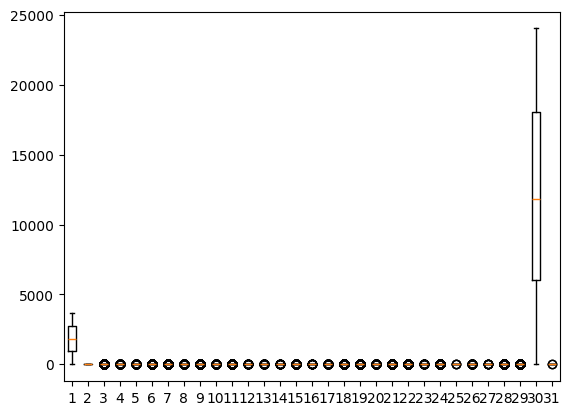

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]= df[column_name].clip(upper=upper_bound)
    df[column_name]= df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [ ]:
for col in num_cols:
    num_df[col] = remove_outliers(num_df,col)

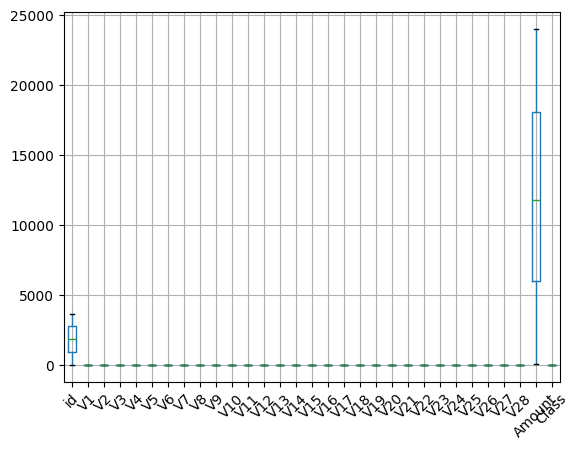

In [ ]:
num_df.boxplot()
plt.xticks(rotation=45)
plt.show()

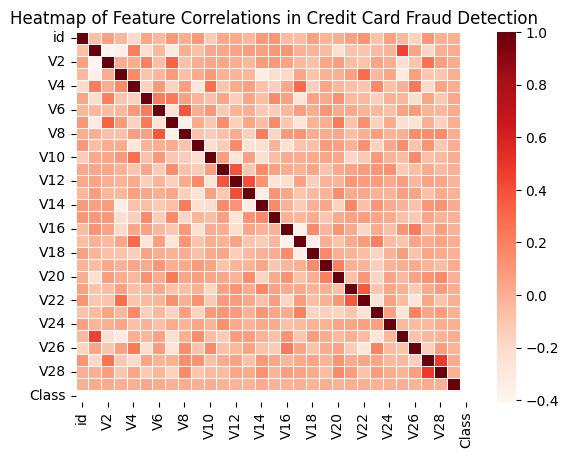

In [ ]:
# Calculate the correlation matrix
corr_matrix = num_df.corr()  # Assuming 'num_df' contains your numerical data

# Now you can create the heatmap
sns.heatmap(corr_matrix, cmap="Reds", annot=False, fmt=".2f", linewidths=0.5)

# Add title
plt.title("Heatmap of Feature Correlations in Credit Card Fraud Detection")

# Show the heatmap
plt.show()


In [ ]:
# Modeling

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
#Decision tree

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_classifier.predict(x_test)
print("Decision Tree Classifier:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
[[759   1]
 [  0 712]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       760
         1.0       1.00      1.00      1.00       712

    accuracy                           1.00      1472
   macro avg       1.00      1.00      1.00      1472
weighted avg       1.00      1.00      1.00      1472



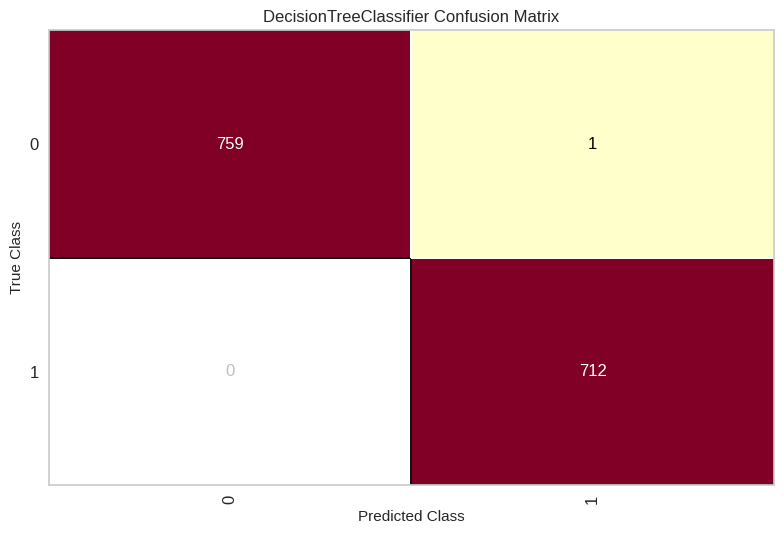

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

confusion= ConfusionMatrix(
  dt_classifier , classes=[0,1])


confusion.fit(x_train, y_train)
confusion.score(x_test, y_test)

confusion.poof()
plt.show()

In [ ]:
# Randomforest

In [ ]:

class_weights = {0: 1, 1: 2}
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf_classifier.predict(x_test)
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
[[760   0]
 [  0 712]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       760
         1.0       1.00      1.00      1.00       712

    accuracy                           1.00      1472
   macro avg       1.00      1.00      1.00      1472
weighted avg       1.00      1.00      1.00      1472



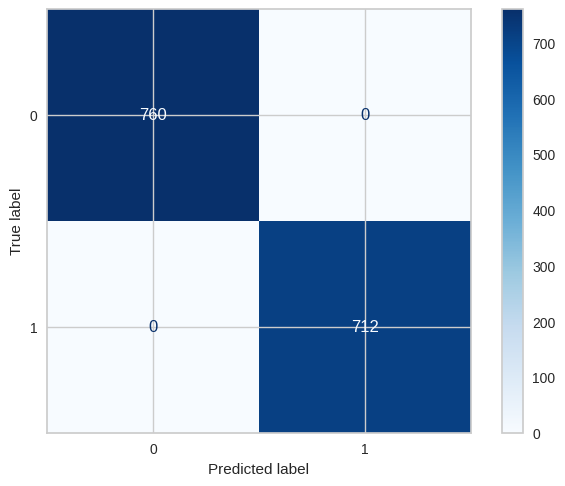

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
target_names = ['0', '1']  # Or any other descriptive labels you prefer
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names) # Use target_names instead of data.target_names
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = lr_classifier.predict(x_test)
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
[[758   2]
 [  0 712]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       760
         1.0       1.00      1.00      1.00       712

    accuracy                           1.00      1472
   macro avg       1.00      1.00      1.00      1472
weighted avg       1.00      1.00      1.00      1472



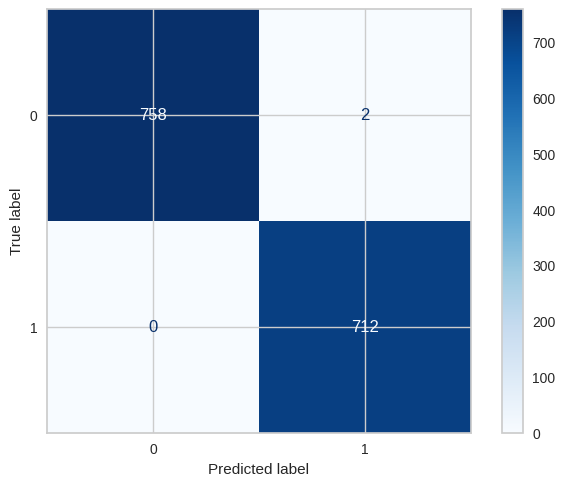

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt #Import this because you are calling it below.
import pandas as pd
from sklearn.metrics import confusion_matrix
# Create a list of display labels
target_names = ['0', '1']  # Or any other descriptive labels you prefer
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix, using the defined list
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names) # Use target_names instead of data.target_names
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Dictionary to store cross-validation scores
cv_scores = {}

# Define the models dictionary
models = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "Logistic Regression": lr_classifier,
    # ... add any other models you want to evaluate
}

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = np.mean(scores)
    print(f'{model_name} CV Accuracy: {np.mean(scores):.4f}')

Decision Tree CV Accuracy: 0.9993
Random Forest CV Accuracy: 1.0000
Logistic Regression CV Accuracy: 0.9988


In [ ]:
best_model_name = max(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]
print(f'\nBest Model: {best_model_name}')


Best Model: Random Forest


In [ ]:
import pickle
filename = 'lr_classifier.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# Testing

In [ ]:

y_pred = best_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 1.0000


In [ ]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       760
         1.0       1.00      1.00      1.00       712

    accuracy                           1.00      1472
   macro avg       1.00      1.00      1.00      1472
weighted avg       1.00      1.00      1.00      1472



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])
print('Confusion Matrix:')
print(cm_df)

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                 736                   0
Actual Positive                   1                   0


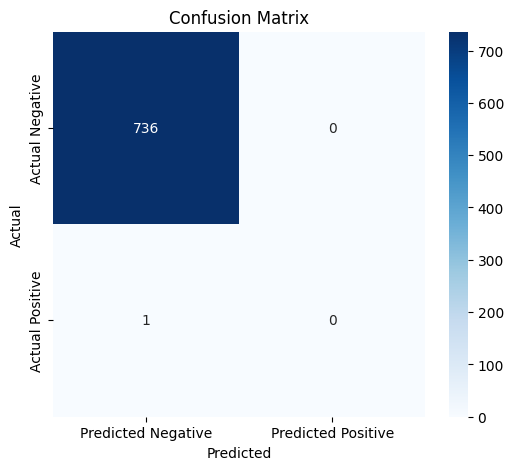

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# preprocessing test data

In [ ]:
# Load the trained Random Forest model from the pickle file
# Load the trained Random Forest model from the pickle file
with open('lr_classifier.pkl', 'rb') as file:
    best_model = pickle.load(file)

In [ ]:
# Load the new, unseen data
new_data = pd.read_csv('/content/test1.csv')

# Separate features from the target variable
x_new = new_data.drop(['Class'], axis=1)

x_new.reset_index(drop=True, inplace=True)
new_data.reset_index(drop=True, inplace=True)

In [ ]:
print(x.head())
print(data['Class'].value_counts())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0 -0.130006  0.727159  ...  0.091202 -0.110552  0.217606 -0.134794  0.165959   
1 -0.133118  0.347452  ... -0.233984 -0.194936 -0.605761  0.079469 -0.577395   
2 -0.095576 -0.261297  ...  0.361652 -0.005020  0.702906  0.945045 -1.154666   
3 -0.065130 -0.205698  ... -0.378223 -0.146927 -0.038212 -0.214048 -1.893131   
4 -0.212660  1.049921  ...  0.247237 -0.106984  0.729727 -0.161666  0.312561   

        V25       V26       V27       V28   

In [ ]:
print(np.isnan(x_new).sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [ ]:
new_data = pd.concat([x, pd.DataFrame(y, columns=['Class'])], axis=1)
new_data = data.dropna(subset=['Class'])
x = new_data.drop(columns=['Class'])
y = new_data['Class']

In [ ]:
y = y.fillna(y.mean())

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Reshape y to be a 2D array for the imputer and fit-transform
y = imputer.fit_transform(y.values.reshape(-1, 1))

# Flatten y back to a 1D array
y = np.ravel(y)

In [ ]:
print(x.isna().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [ ]:
# Check for NaNs
assert not x.isna().any().any(), "X contains NaN values"
assert not np.isnan(y).any(), "y contains NaN values"  # Use np.isnan for NumPy arrays

# Check for infinite values
assert np.isfinite(x.values).all(), "X contains infinite values"
assert np.isfinite(y).all(), "y contains infinite values"

In [ ]:
x_new = x_new.dropna()
predictions = best_model.predict(x_new)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:

if len(predictions) ==len(new_data):
    new_data['Predictions'] = predictions
    print(new_data.head())
else:
  print(f"Mismatch: {len(predictions)} predictions vs {len(new_data)} rows in new_data")

Mismatch: 737 predictions vs 3681 rows in new_data


In [ ]:
print(x_train.shape)
print(x_new.shape)

(2946, 30)
(737, 30)
